In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#help() - вызыввает хелп любой функции или пакета

In [3]:
train_df = pd.read_csv("titanic_train.csv") 
test_df = pd.read_csv("titanic_test.csv")

train_df.head(20)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
y = train_df['survived'] # Выделили столбец ответов из тренировочной выборки

In [5]:
train_df.describe(include='all') 

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Emanuel, Miss. Virginia Ethel",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
test_df.describe(include='all')



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Andersson, Mr. Johan Samuel",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


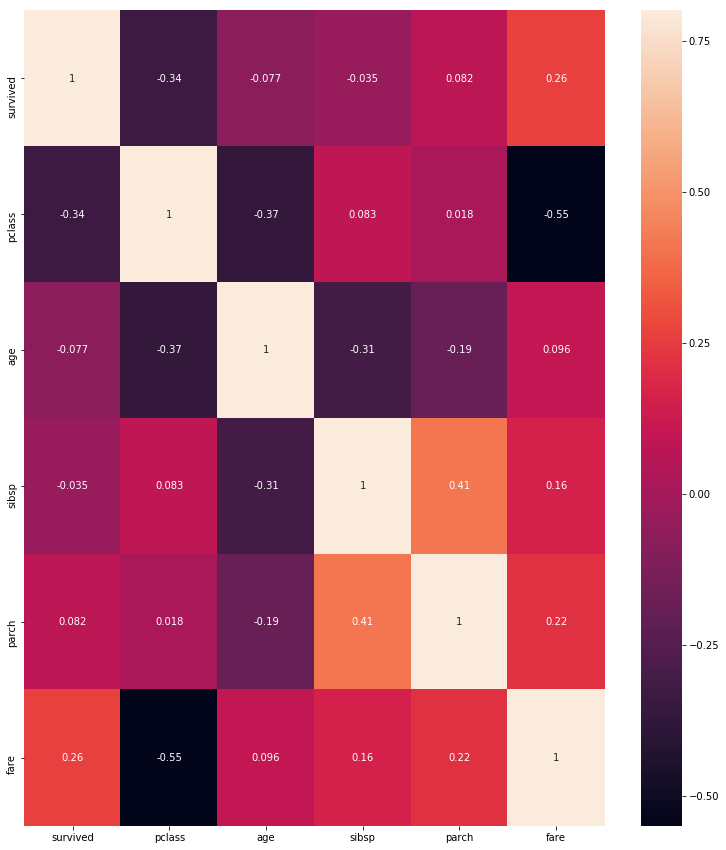

In [7]:
plt.subplots(figsize=(13,15))
sns.heatmap(train_df.corr(),vmax=0.8, annot=True);

In [8]:
train_df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

**Заполним пропуски медианными значениями.**

In [9]:
train_df['age'].fillna(train_df['age'].median(), inplace=True)

In [10]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [11]:
train_df['embarked'].fillna('S' , inplace=True)

In [12]:
train_df['fare'].fillna(train_df['fare'].median(), inplace = True)

# Кодируем категориальные признаки Pclass, Sex, SibSp, Parch и Embarked с помощью техники One-Hot-Encoding.
Для этого используем 

**pd.get_dummies**

Преобразовать категориальную переменную в переменные фиктивного / индикатора

С **one- hot - encoding** категориальная функция становится массивом, размер которого представляет собой количество возможных вариантов для этих функций, то есть:

In [13]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['pclass'], 
                                               prefix="pclass"),
                      pd.get_dummies(train_df['sex'], prefix="sex"),
                      pd.get_dummies(train_df['sibsp'], prefix="sibsp"),
                      pd.get_dummies(train_df['parch'], prefix="parch"),
                     pd.get_dummies(train_df['embarked'], prefix="embarked")],
                     axis=1)


test_df = pd.concat([test_df, pd.get_dummies(test_df['Pclass'], 
                                             prefix="PClass"),
                      pd.get_dummies(test_df['Sex'], prefix="Sex"),
                      pd.get_dummies(test_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(test_df['Parch'], prefix="Parch"),
                    pd.get_dummies(test_df['Embarked'], prefix="Embarked")],
                     axis=1)

In [14]:
train_df.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,1,0,0


In [15]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,0,0,0,1


### Затем мы убираем ненужные нам признаки

In [16]:
train_df.drop(['survived', 'pclass', 'name', 'sex', 'sibsp', 
               'parch', 'ticket', 'cabin', 'embarked'], 
              axis=1, inplace=True)
test_df.drop(['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], 
             axis=1, inplace=True)

# Обязательно проведем сравнение наших колонок а затем выбросим ненужные нам колонки

In [17]:
train_df.columns

Index(['age', 'fare', 'pclass_1', 'pclass_2', 'pclass_3', 'sex_female',
       'sex_male', 'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4',
       'sibsp_5', 'sibsp_8', 'parch_0', 'parch_1', 'parch_2', 'parch_3',
       'parch_4', 'parch_5', 'parch_6', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [18]:
test_df.columns

Index(['Age', 'Fare', 'PClass_1', 'PClass_2', 'PClass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Parch_9', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [19]:
test_df.equals(train_df) # Проверяем эквивалентен ли один DATAFRAME другому

False

Получили вывод что датафреймы не равны, значит проверим по сколько столбцов и строк они содержат

In [20]:
train_df.shape, test_df.shape

((891, 24), (418, 25))

### Мы видим, что в тренировочной выборке появляется столбец **PARCH 9**

Множество в python - "контейнер", содержащий не повторяющиеся элементы в случайном порядке.

Как видно из примера, множества имеет тот же литерал, что и словарь, но пустое множество с помощью литерала создать нельзя.

Множества удобно использовать для удаления повторяющихся элементов:


In [21]:
set(test_df.columns) - set(train_df.columns) # Сравниваем сеты (колонки) ДАТАФРЕЙМОВ 
#Но так как у нас отличаются по заглавной букве наши названия колонок придется просто искать лишнюю колонку

{'Age',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Fare',
 'PClass_1',
 'PClass_2',
 'PClass_3',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6',
 'Parch_9',
 'Sex_female',
 'Sex_male',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'SibSp_5',
 'SibSp_8'}

## 1. Дерево решений без настройки параметров

## ЗАДАНИЕ 1

### Обучите на имеющейся выборке дерево решений (DecisionTreeClassifier) максимальной глубины, Используйте параметр random_state=17 для воспроизводимости результатов.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_predict

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
?train_test_split

## Так как наши данные уже разбиты  на обучающую и проверочную, то помещаем тот код, который бы ее разбивал в коментарий

In [28]:
#x_train,x_test,y_train, y_test=train_test_split(train_df, train_df['survived'], test_size = 0.3, random_state=17)

In [29]:
x_train=train_df

In [30]:
x_train.head(2)

,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [31]:
y_train = y

Создадим дерево

In [32]:
tree_clas1=DecisionTreeClassifier(random_state=17,max_depth=2)

Для проверки того, как работает наше дерево воспользуемся обучающей выборкой

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score?

In [35]:
cross_val_score(tree_clas1,x_train,y_train,cv=5)

array([0.74860335, 0.79329609, 0.78651685, 0.75280899, 0.78531073])

**Найдем среднее значение из всех пяти циклов обучения**

In [36]:
np.mean(cross_val_score(tree_clas1,x_train,y_train,cv=5))

0.7733072037001376

Зададим гиперпараметры нашей модели

Теперь после проверки качества построенный модели на обучающей выборке передадим данные в нашу модель

In [37]:
%%time
tree_grid

NameError: name 'tree_grid' is not defined

### ТАК КАК СЕЙЧАС МЫ ПРОСТО ОБУЧАЕМ НАШУ МОДЕЛЬ НА ГЛУБИНЕ 2 И НА РАНДОМ СТЭЙТ - 17, то запишем все это в одну строчку

In [38]:
tree_cl = DecisionTreeClassifier(max_depth=2,random_state=17).fit(x_train,y_train)

## ЗАДАНИЕ 2 

### Сделайте с помощью полученной модели прогноз для тестовой выборки


In [39]:
tree_cl.score(x_train,y_train) 

0.7957351290684624

In [40]:
export_graphviz?

In [41]:
export_graphviz(tree_cl, out_file='Tit.dot', feature_names=x_train.columns, filled=True)

In [42]:
!dot -Tpng Tit.dot -o Tit.png

<img src = "Tit.png">

# Задание 3

### Сформируйте файл посылки и отправьте на Kaggle

# 2. Дерево решений с настройкой параметров

## ЗАДАНИЕ 1 

### Обучите на имеющейся выборке дерево решений (DecisionTreeClassifier). Также укажите random_state=17. Максимальную глубину и минимальное число элементов в листе настройте на 5-кратной кросс-валидации с помощью GridSearchCV.

Разобьем нашу тренировочную выборку на тестовую и обучающую

In [43]:
train_test_split?

In [65]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=17)

Random_state - позволяет, провести тот же самый СПЛИТ на другом устройстве с такими же выборками и параметрами

In [45]:
#y_train=y;
#x_train=train_df;

In [66]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape, 

((268, 24), (268,), (623, 24), (623,))

In [67]:
tree_classif=DecisionTreeClassifier(random_state=17)

In [68]:
tree_params={'max_depth' : np.arange(1,30,2), 'max_features' : np.array([0.5,0.7,1])}

In [48]:
#tree_grid=GridSearchCV?

In [69]:
tree_grid=GridSearchCV(tree_classif,tree_params, cv=5, n_jobs=-1)

In [70]:
np.mean(cross_val_score(tree_grid,x_train,y_train,cv=5))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8137753200204813

Теперь передадим все наши параметры в модель и посмотрим время за которое она будет обучаться

In [71]:
%time
tree_grid.fit(x_train,y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]), 'max_features': array([0.5, 0.7, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
#accuracy_score(y_train,tree_grid.best_estimator_.predict(x_train))
#(tree_grid,x_train,y_train,cv=5))

### Посмотим какие же параметры будут лучшими для нашего дерева
### Проверим точность лучшей модели

In [72]:
tree_grid.best_score_, tree_grid.best_params_

(0.8330658105939005, {'max_depth': 3, 'max_features': 1.0})

А теперь посмотрим нашу самую лучшую модель

In [73]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [74]:
tree_grid.best_estimator_.score(x_train,y_train)

0.8443017656500803

### Сделайте с помощью полученной модели прогноз для тестовой выборки.

Так как мы фигово обработали тестовую выборку и не удалили лишний столбец (Parch_9)  и строку со значенями NAN, проведем еще одну чистку данных

In [56]:
test_df.isna().sum() 

Age           0
Fare          1
PClass_1      0
PClass_2      0
PClass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Parch_9       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

**Видим что один из столбцов содержит значения NAN**

In [57]:
test_df.dropna(inplace=True)

In [58]:
test_df.isna().sum() 

Age           0
Fare          0
PClass_1      0
PClass_2      0
PClass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Parch_9       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [59]:
test_df.drop(['Parch_9'], axis=1, inplace=True)

In [60]:
test_df.shape

(417, 24)

### Таким образом мы избавились от NAN значений

In [76]:
tree_pred=tree_grid.best_estimator_.predict(x_test)
tree_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0])

In [ ]:
tree_pred.shape

In [ ]:
from sklearn.metrics import accuracy_score


In [77]:
accuracy_score(y_test,tree_pred)

0.7723880597014925

In [85]:
abs(y_test-tree_pred).sum() / y_test.shape


array([0.22761194])

In [86]:
1-abs(y_test-tree_pred).sum() / y_test.shape

array([0.77238806])

In [91]:
1-np.mean(abs(tree_pred))

0.7014925373134329

In [92]:
test_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [95]:
dic={'C': 1, 'Q':2, 'S' : 3}

In [97]:
tree_grid.best_estimator_.score(x_test,y_test)

0.7723880597014925

In [101]:
roc_auc_score(y_test, tree_pred)

0.7450220921558501